In [1]:
# @title Célula 1: Instalação e Importações Essenciais
# Instala o PennyLane (necessário no Colab se não estiver pré-instalado)
!pip install pennylane --quiet

# Importações Principais
import torch  # Para tensores, operações matemáticas e diferenciação automática (autograd)
import random # Para gerar jogos aleatórios
import pennylane as qml # A biblioteca principal de QML
import numpy as np # Para operações numéricas, especialmente após o treinamento
from torch import optim # Otimizadores para o treinamento (Adam)
import math # Para usar pi na codificação dos dados
import matplotlib.pyplot as plt # Para plotar gráficos

# Configurações para reprodutibilidade (fixa as sementes aleatórias)
torch.backends.cudnn.deterministic = True
torch.manual_seed(16)
random.seed(16)
np.random.seed(16) # Adicionado para garantir a reprodutibilidade do numpy também

print("Bibliotecas instaladas e importadas. Sementes aleatórias fixadas.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00
Bibliotecas instaladas e importadas. Sementes aleatórias fixadas.


### Explicação da Célula 1: Instalação e Importações Essenciais

Esta célula inicial configura o ambiente de execução no Google Colab.
1.  **`!pip install pennylane --quiet`**: Instala a biblioteca PennyLane, que é a ferramenta principal para construir e executar os circuitos de Quantum Machine Learning (QML). O comando `!` permite executar comandos do sistema operacional, e `--quiet` reduz a quantidade de texto exibida durante a instalação.
2.  **Importações**: Carrega as bibliotecas necessárias:
    *   `torch`: O PyTorch é usado para manipulação de tensores (arrays multidimensionais) e, crucialmente, para calcular automaticamente os gradientes necessários para treinar os modelos de machine learning (incluindo os quânticos) através do `autograd`.
    *   `random`: Usado para a lógica de geração aleatória dos jogos da velha no dataset.
    *   `pennylane as qml`: A biblioteca principal para definir circuitos quânticos (`qml.QNode`), executá-los (`qml.device`), e integrá-los com o PyTorch.
    *   `numpy as np`: Uma biblioteca fundamental para computação numérica em Python, usada aqui principalmente para manipulação de resultados pós-treinamento e algumas operações matemáticas.
    *   `torch.optim`: Importa os otimizadores do PyTorch, como o `Adam`, que serão usados para ajustar os parâmetros do circuito quântico durante o treinamento.
    *   `math`: Usado para obter o valor de π (pi) para codificar os dados do tabuleiro em ângulos de rotação.
    *   `matplotlib.pyplot as plt`: A biblioteca padrão para criar gráficos e visualizações em Python, usada para plotar os resultados do treinamento.
3.  **Reprodutibilidade**: As linhas `torch.manual_seed(16)`, `random.seed(16)`, etc., fixam as "sementes" dos geradores de números aleatórios. Isso garante que, ao executar o notebook novamente, os resultados (jogos gerados, inicialização de parâmetros, ordem de embaralhamento) sejam exatamente os mesmos, o que é essencial para comparar experimentos e depurar o código.

### Explicação da Célula 2: Conceitos Fundamentais - Simetria e GQML

Esta célula de texto (Markdown) introduz os conceitos teóricos essenciais por trás do Quantum Machine Learning Geométrico (GQML), que é o foco deste notebook.
1.  **Simetria em Machine Learning**: Explica intuitivamente o que significa uma simetria em um problema de aprendizado de máquina, usando o exemplo da classificação de imagens. Destaca os benefícios de explorar simetrias: redução de parâmetros e melhor generalização.
2.  **Aprendizado Equivariante**: Define formalmente o conceito de equivariância - a propriedade chave que um modelo (como um circuito quântico) deve ter para respeitar uma simetria. A ideia é que transformar a entrada por uma simetria e depois aplicar o modelo é o mesmo que aplicar o modelo primeiro e depois transformar a saída pela mesma simetria.
3.  **QML Geométrico (GQML)**: Apresenta o GQML como a aplicação dessas ideias no domínio quântico, aproveitando a conexão natural entre operações quânticas (unitárias) e a matemática das simetrias (teoria de grupos).
4.  **Teoria de Grupos e Representações**: Fornece um resumo rápido dos conceitos matemáticos necessários: o que é um grupo (a formalização das simetrias), o que é uma representação (mapear elementos do grupo para matrizes/operações lineares), e a importância das representações unitárias para circuitos quânticos. Menciona o grupo D4 (simetrias do quadrado) como relevante para o Jogo da Velha.
5.  **Twirling**: Descreve o "twirling" como uma técnica prática para construir portas quânticas que respeitam uma determinada simetria. Explica a fórmula e a intuição por trás dela (essencialmente, calcular a média de uma operação sobre todas as transformações de simetria). Destaca a consequência prática no nosso caso: a necessidade de **compartilhar parâmetros** entre qubits ou portas que são mapeados uns nos outros pela simetria.

In [2]:
# @title Célula 3: Geração do Dataset (Jogo da Velha)

# Função para criar um tabuleiro vazio (3x3)
# Representação: 0 = vazio, 1 = Jogador 1 (O), -1 = Jogador 2 (X)
def create_board():
    # Retorna um tensor do PyTorch preenchido com zeros
    return torch.tensor([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=torch.float32)

# Função para encontrar todas as posições vazias no tabuleiro
def possibilities(board):
    l = []
    # Itera sobre linhas (i) e colunas (j)
    for i in range(3):
        for j in range(3):
            # Se a célula (i, j) está vazia (valor 0)
            if board[i, j] == 0:
                # Adiciona as coordenadas (linha, coluna) à lista
                l.append((i, j))
    return l

# Função para um jogador fazer uma jogada aleatória
def random_place(board, player):
    # Obtém a lista de posições vazias
    selection = possibilities(board)
    # Escolhe aleatoriamente uma das posições disponíveis
    current_loc = random.choice(selection)
    # Coloca a marca do jogador (1 ou -1) na posição escolhida
    board[current_loc] = player
    return board

# Funções para verificar vitória (linhas, colunas, diagonais)
def row_win(board, player):
    for x in range(3): # Itera sobre as linhas
        win = True
        for y in range(3): # Itera sobre as colunas da linha x
            if board[x, y] != player:
                win = False
                break # Não precisa checar o resto da linha
        if win:
            return True # Encontrou uma linha vencedora
    return False # Nenhuma linha vencedora encontrada

def col_win(board, player):
    for x in range(3): # Itera sobre as colunas
        win = True
        for y in range(3): # Itera sobre as linhas da coluna x
            if board[y, x] != player:
                win = False
                break # Não precisa checar o resto da coluna
        if win:
            return True # Encontrou uma coluna vencedora
    return False # Nenhuma coluna vencedora encontrada

def diag_win(board, player):
    # Verifica a diagonal principal
    win1 = True
    for i in range(3):
        if board[i, i] != player:
            win1 = False
            break
    if win1:
        return True

    # Verifica a diagonal secundária
    win2 = True
    for i in range(3):
        if board[i, 2 - i] != player:
            win2 = False
            break
    if win2:
        return True

    return False # Nenhuma diagonal vencedora

# Função para avaliar o estado do jogo: vitória de 1, vitória de -1, empate (0) ou jogo em andamento (None)
def evaluate_game(board):
    winner = None
    # Checa se o jogador 1 (O) venceu
    if row_win(board, 1) or col_win(board, 1) or diag_win(board, 1):
        winner = 1
    # Checa se o jogador -1 (X) venceu
    elif row_win(board, -1) or col_win(board, -1) or diag_win(board, -1):
        winner = -1
    # Checa se houve empate (tabuleiro cheio sem vencedor)
    elif torch.all(board != 0): # Verifica se todas as células são diferentes de 0
        winner = 0
    # Se nenhuma das condições acima for atendida, o jogo continua (winner permanece None)
    return winner

# Função principal para simular um jogo completo
def play_game():
    # Cria tabuleiro vazio, inicializa vencedor como None, contador de jogadas
    board, winner, counter = create_board(), None, 1
    # Loop enquanto não houver vencedor/empate
    while winner is None:
        # Alterna entre jogador 1 e -1
        for player in [1, -1]:
            # Faz uma jogada aleatória
            board = random_place(board, player)
            # Incrementa o contador de jogadas (não estritamente necessário aqui)
            counter += 1
            # Avalia o estado do jogo após a jogada
            winner = evaluate_game(board)
            # Se o jogo acabou (alguém venceu ou empatou), sai do loop interno
            if winner is not None:
                break
    # Retorna o tabuleiro final (achatado em um vetor de 9 elementos) e o resultado (1, -1 ou 0)
    return [board.flatten(), winner]

# Função para criar um dataset com um número específico de exemplos para cada resultado
def create_dataset(size_for_each_winner):
    # Dicionário para armazenar os tabuleiros por vencedor
    game_d = {-1: [], 0: [], 1: []} # -1: X vence, 0: Empate, 1: O vence

    print(f"Gerando dataset com {size_for_each_winner} exemplos para cada classe...")
    # Continua gerando jogos até ter o número desejado de exemplos para cada classe
    while min(len(v) for v in game_d.values()) < size_for_each_winner:
        board, winner = play_game()
        # Adiciona o tabuleiro à lista correspondente ao vencedor, se ainda não tivermos exemplos suficientes
        if len(game_d[winner]) < size_for_each_winner:
            game_d[winner].append(board)
            # Print de progresso simples
            if sum(len(v) for v in game_d.values()) % 50 == 0:
                 print(f"  ... {sum(len(v) for v in game_d.values())} jogos coletados")


    # Combina todos os exemplos em uma única lista de tuplas (tabuleiro, vencedor)
    res = []
    for winner, boards in game_d.items():
        res += [(board, winner) for board in boards]

    print("Dataset gerado.")
    # Embaralha o dataset final para garantir que as classes não estejam agrupadas
    random.shuffle(res)
    return res

# Define o número de exemplos para treino e validação (dividido por 3 para ter partes iguais)
NUM_TRAINING_PER_CLASS = 150 # Total 450
NUM_VALIDATION_PER_CLASS = 200 # Total 600

# Cria os datasets de treino e validação
# torch.no_grad() desabilita o cálculo de gradientes durante a geração de dados, economizando memória
with torch.no_grad():
    dataset_train = create_dataset(NUM_TRAINING_PER_CLASS)
    dataset_val = create_dataset(NUM_VALIDATION_PER_CLASS)

# Mostra o tamanho dos datasets criados
print(f"\nTamanho do dataset de treino: {len(dataset_train)}")
print(f"Tamanho do dataset de validação: {len(dataset_val)}")
# Mostra um exemplo do dataset
print("\nExemplo de dado (Tabuleiro achatado, Vencedor):")
print(dataset_train[0])

Gerando dataset com 150 exemplos para cada classe...
  ... 50 jogos coletados
  ... 100 jogos coletados
  ... 150 jogos coletados
  ... 200 jogos coletados
  ... 250 jogos coletados
  ... 300 jogos coletados
  ... 350 jogos coletados
  ... 400 jogos coletados
  ... 450 jogos coletados
Dataset gerado.
Gerando dataset com 200 exemplos para cada classe...
  ... 50 jogos coletados
  ... 100 jogos coletados
  ... 150 jogos coletados
  ... 200 jogos coletados
  ... 250 jogos coletados
  ... 300 jogos coletados
  ... 350 jogos coletados
  ... 400 jogos coletados
  ... 450 jogos coletados
  ... 500 jogos coletados
  ... 550 jogos coletados
  ... 600 jogos coletados
Dataset gerado.

Tamanho do dataset de treino: 450
Tamanho do dataset de validação: 600

Exemplo de dado (Tabuleiro achatado, Vencedor):
(tensor([ 1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.]), 0)


### Explicação da Célula 3: Geração do Dataset (Jogo da Velha)

Esta célula contém toda a lógica para simular jogos da velha aleatórios e criar os datasets de treino e validação.
1.  **Funções Auxiliares**: Define várias funções para gerenciar o jogo:
    *   `create_board()`: Cria um tabuleiro 3x3 vazio (representado por um tensor PyTorch com zeros). A representação usa `0` para vazio, `1` para jogador 'O' e `-1` para jogador 'X'.
    *   `possibilities()`: Encontra as posições vazias no tabuleiro.
    *   `random_place()`: Permite que um jogador faça uma jogada aleatória em uma casa vazia.
    *   `row_win()`, `col_win()`, `diag_win()`: Verificam se um jogador venceu por linha, coluna ou diagonal.
    *   `evaluate_game()`: Determina o estado do jogo: vitória de 'O' (1), vitória de 'X' (-1), empate (0) ou jogo em andamento (`None`).
2.  **Simulação do Jogo (`play_game`)**: Combina as funções auxiliares para simular um jogo completo com jogadas aleatórias até que um resultado seja alcançado (vitória ou empate). Retorna o tabuleiro final (achatado em um vetor de 9 elementos) e o resultado.
3.  **Criação do Dataset (`create_dataset`)**: Gera múltiplos jogos usando `play_game` e organiza os resultados para garantir um número equilibrado de exemplos para cada classe (vitória 'O', vitória 'X', empate). Isso evita que o modelo de machine learning fique enviesado. Retorna uma lista de tuplas `(tabuleiro, resultado)`.
4.  **Geração Final**: Define o número desejado de exemplos para treino e validação (dividido igualmente entre as classes) e chama `create_dataset` para gerar `dataset_train` e `dataset_val`. O `with torch.no_grad():` é usado para otimizar a memória durante a geração de dados, pois não precisamos calcular gradientes aqui. Finalmente, imprime informações sobre os datasets criados.

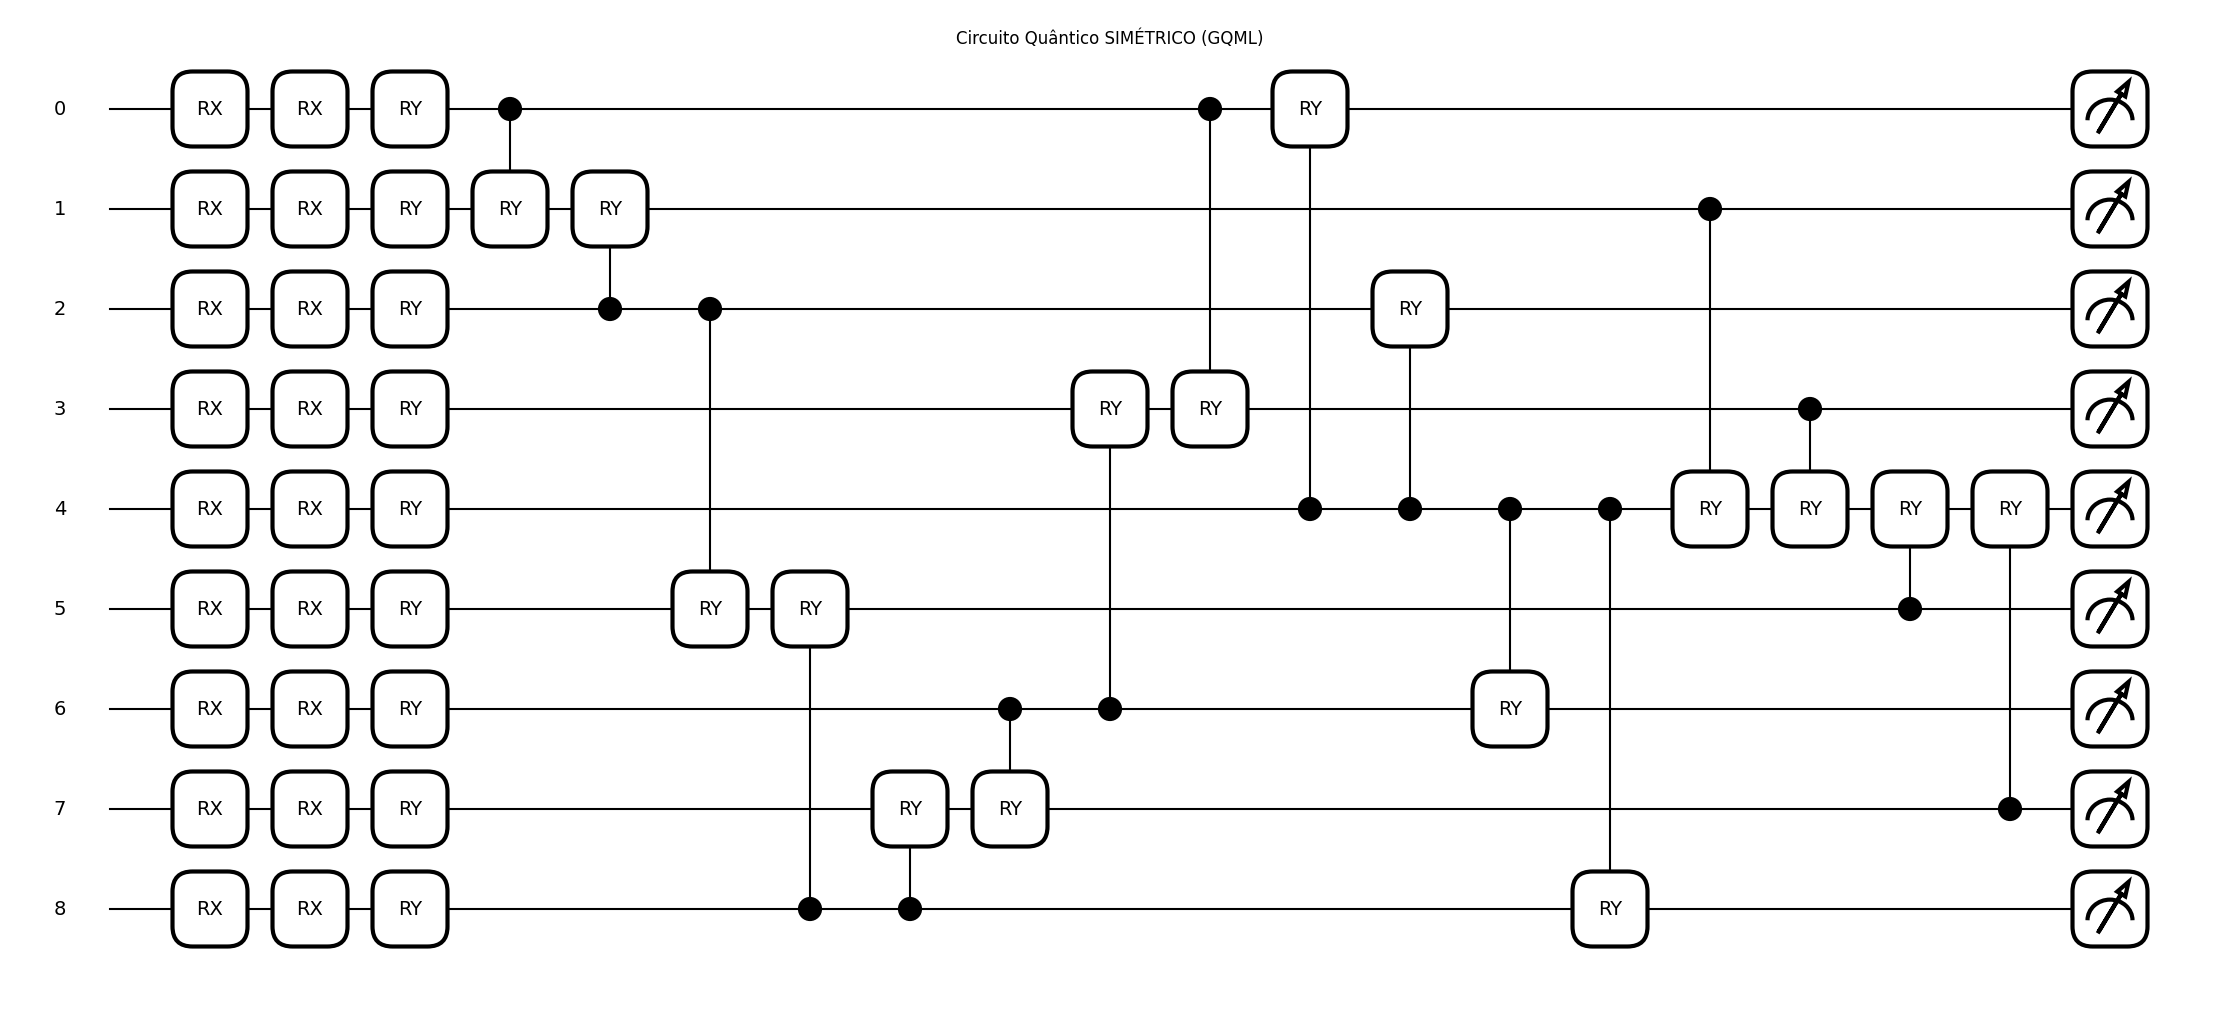

Número de parâmetros treináveis no circuito SIMÉTRICO: 9


In [3]:
# @title Célula 4: Definição do Circuito Quântico SIMÉTRICO (GQML)

# Configura o dispositivo quântico (simulador)
# Usaremos 9 qubits, um para cada casa do tabuleiro
num_wires = 9
dev = qml.device("default.qubit", wires=num_wires) # Simulador padrão do PennyLane

# --- Definição dos Observáveis Simétricos ---
# Estes são os observáveis cujos valores esperados usaremos como saída do modelo.
# Eles são construídos para respeitar a simetria D4 do quadrado.

# Observável para o qubit central (posição 4): Invariante por todas as simetrias.
ob_center = qml.PauliZ(4)

# Observável para os cantos (posições 0, 2, 6, 8): Média do PauliZ nos cantos.
# A média garante que a ordem dos cantos não importa (respeita a simetria rotacional/reflexiva dos cantos).
ob_corner = (qml.PauliZ(0) + qml.PauliZ(2) + qml.PauliZ(6) + qml.PauliZ(8)) * (1 / 4)

# Observável para as bordas (posições 1, 3, 5, 7): Média do PauliZ nas bordas.
# Similar aos cantos, a média respeita a simetria das bordas.
ob_edge = (qml.PauliZ(1) + qml.PauliZ(3) + qml.PauliZ(5) + qml.PauliZ(7)) * (1 / 4)

# Índice dos qubits (visualização):
# 0 1 2
# 3 4 5
# 6 7 8

# --- Definição do QNode Simétrico ---
# @qml.qnode é um decorador que transforma uma função Python definindo
# operações quânticas em um "nó quântico" executável no dispositivo 'dev'.
@qml.qnode(dev, interface='torch') # interface='torch' integra com PyTorch para gradientes
def circuit_symmetric(x, params):
    """
    Circuito Quântico Parametrizado (PQC) que respeita a simetria D4.

    Args:
        x (torch.Tensor): Vetor de entrada codificado (ângulos baseados no tabuleiro). Tamanho 9.
        params (torch.Tensor): Vetor de parâmetros treináveis do circuito. Tamanho 9 neste caso.
                                 (1 p/ centro Rx, 1 p/ centro Ry,
                                  1 p/ cantos Rx, 1 p/ cantos Ry,
                                  1 p/ bordas Rx, 1 p/ bordas Ry,
                                  1 p/ anel Cry, 1 p/ centro-cantos Cry, 1 p/ centro-bordas Cry)

    Returns:
        list[torch.Tensor]: Lista dos valores esperados dos 3 observáveis simétricos.
    """

    # 1. Camada de Codificação de Dados (Embedding)
    # Aplica rotações RX com ângulos baseados na entrada 'x' a cada qubit.
    # Cada qubit recebe uma rotação correspondente à sua casa no tabuleiro.
    for i in range(num_wires):
        qml.RX(x[i], wires=i)

    # 2. Camadas Variacionais (Ansatz) - SIMÉTRICAS
    # Aqui, aplicamos as portas parametrizadas de forma a respeitar a simetria D4.
    # Isso é feito COMPARTILHANDO parâmetros entre qubits/portas simetricamente equivalentes.

    # --- Rotações de 1 Qubit ---
    # Centro (qubit 4): É único, então tem seus próprios parâmetros.
    qml.RX(params[0], wires=4)
    qml.RY(params[1], wires=4)

    # Cantos (qubits 0, 2, 6, 8): USAM O MESMO PARÂMETRO (params[2] para RX, params[3] para RY).
    # Isso implementa o resultado do "twirling" para rotações nos cantos.
    for i in [0, 2, 6, 8]:
        qml.RX(params[2], wires=i)
        qml.RY(params[3], wires=i)

    # Bordas (qubits 1, 3, 5, 7): USAM O MESMO PARÂMETRO (params[4] para RX, params[5] para RY).
    # Implementa o "twirling" para rotações nas bordas.
    for i in [1, 3, 5, 7]:
        qml.RX(params[4], wires=i)
        qml.RY(params[5], wires=i)

    # --- Portas de Emaranhamento de 2 Qubits (Controladas) ---
    # Usamos CRY, mas poderíamos usar outras portas controladas.
    # Novamente, compartilhamos parâmetros para grupos de pares simetricamente equivalentes.

    # Grupo 1: "Anel" conectando bordas adjacentes (e cantos). USA params[6].
    # (0,1), (2,1), (2,5), (8,5), (8,7), (6,7), (6,3), (0,3)
    qml.CRY(params[6], wires=[0, 1])
    qml.CRY(params[6], wires=[2, 1])
    qml.CRY(params[6], wires=[2, 5])
    qml.CRY(params[6], wires=[8, 5])
    qml.CRY(params[6], wires=[8, 7])
    qml.CRY(params[6], wires=[6, 7])
    qml.CRY(params[6], wires=[6, 3])
    qml.CRY(params[6], wires=[0, 3])

    # Grupo 2: Conectando centro (4) aos cantos (0, 2, 6, 8). USA params[7].
    for i in [0, 2, 6, 8]:
        qml.CRY(params[7], wires=[4, i]) # Centro é o controle

    # Grupo 3: Conectando bordas (1, 3, 5, 7) ao centro (4). USA params[8].
    # A ordem (controle, alvo) pode importar, aqui as bordas são controle.
    # Poderia ser qml.CRY(params[8], wires=[4, i]) também, seria outro parâmetro.
    # O importante é que todos os pares deste grupo usem o *mesmo* parâmetro.
    for i in [1, 3, 5, 7]:
        qml.CRY(params[8], wires=[i, 4]) # Bordas são controle

    # 3. Medição
    # Retorna a lista de valores esperados dos observáveis simétricos definidos anteriormente.
    # Estes valores serão usados como a saída bruta do modelo QML.
    return [qml.expval(ob_center), qml.expval(ob_corner), qml.expval(ob_edge)]

# --- Visualização do Circuito Simétrico ---
# Cria parâmetros fictícios (zeros) para poder desenhar o circuito
dummy_x_sym = torch.zeros(num_wires)
dummy_params_sym = torch.zeros(9) # 9 parâmetros no modelo simétrico

fig, ax = qml.draw_mpl(circuit_symmetric)(dummy_x_sym, dummy_params_sym)
fig.suptitle("Circuito Quântico SIMÉTRICO (GQML)")
plt.show()

# Imprime o número de parâmetros
print(f"Número de parâmetros treináveis no circuito SIMÉTRICO: {len(dummy_params_sym)}")

### Explicação da Célula 4: Definição do Circuito Quântico SIMÉTRICO (GQML)

Esta célula define o primeiro e mais importante modelo QML: aquele que incorpora explicitamente as simetrias do Jogo da Velha (simetrias do grupo D4).
1.  **Dispositivo Quântico (`qml.device`)**: Configura o simulador quântico (`"default.qubit"`) do PennyLane que será usado para executar os circuitos, especificando que ele operará sobre 9 qubits (`wires=num_wires`).
2.  **Observáveis Simétricos**: Define os operadores quânticos cujos valores esperados serão medidos no final do circuito. Eles são construídos para serem *invariantes* sob as simetrias do quadrado:
    *   `ob_center`: Mede o `PauliZ` no qubit central (4), que é deixado fixo pelas simetrias.
    *   `ob_corner`: Mede a *média* do `PauliZ` nos 4 qubits dos cantos (0, 2, 6, 8). A média garante invariância se os cantos forem permutados.
    *   `ob_edge`: Mede a *média* do `PauliZ` nos 4 qubits das bordas (1, 3, 5, 7). A média garante invariância se as bordas forem permutadas.
3.  **Nó Quântico Simétrico (`@qml.qnode`)**: O decorador `@qml.qnode(dev, interface='torch')` transforma a função Python `circuit_symmetric` em um objeto executável no dispositivo `dev`. A `interface='torch'` permite a integração com o PyTorch para o cálculo automático de gradientes, essencial para o treinamento.
4.  **Estrutura do Circuito (`circuit_symmetric`)**:
    *   **Entrada**: Recebe `x` (dados do tabuleiro codificados como ângulos) e `params` (parâmetros treináveis).
    *   **Codificação (Embedding)**: Uma camada inicial aplica rotações `RX` a cada qubit com ângulos vindos de `x`, carregando a informação do tabuleiro no estado quântico.
    *   **Camadas Variacionais (Ansatz) - SIMÉTRICAS**: Esta é a parte crucial do GQML. Portas quânticas parametrizadas (`RX`, `RY`, `CRY`) são aplicadas, mas com **compartilhamento de parâmetros**. Qubits/portas que são equivalentes sob as simetrias do quadrado (ex: todos os cantos, todas as bordas, pares centro-canto) usam o *mesmo* parâmetro treinável (ex: `params[2]` para todos os `RX` nos cantos). Isso força o circuito a respeitar a simetria e reduz drasticamente o número de parâmetros (para 9 neste caso).
    *   **Medição**: Retorna uma lista com os valores esperados (`qml.expval`) dos três observáveis simétricos definidos anteriormente. Este vetor de 3 números será a saída bruta do modelo.
5.  **Visualização e Contagem**: Desenha o circuito usando `qml.draw_mpl` e imprime o número total de parâmetros treináveis (9).

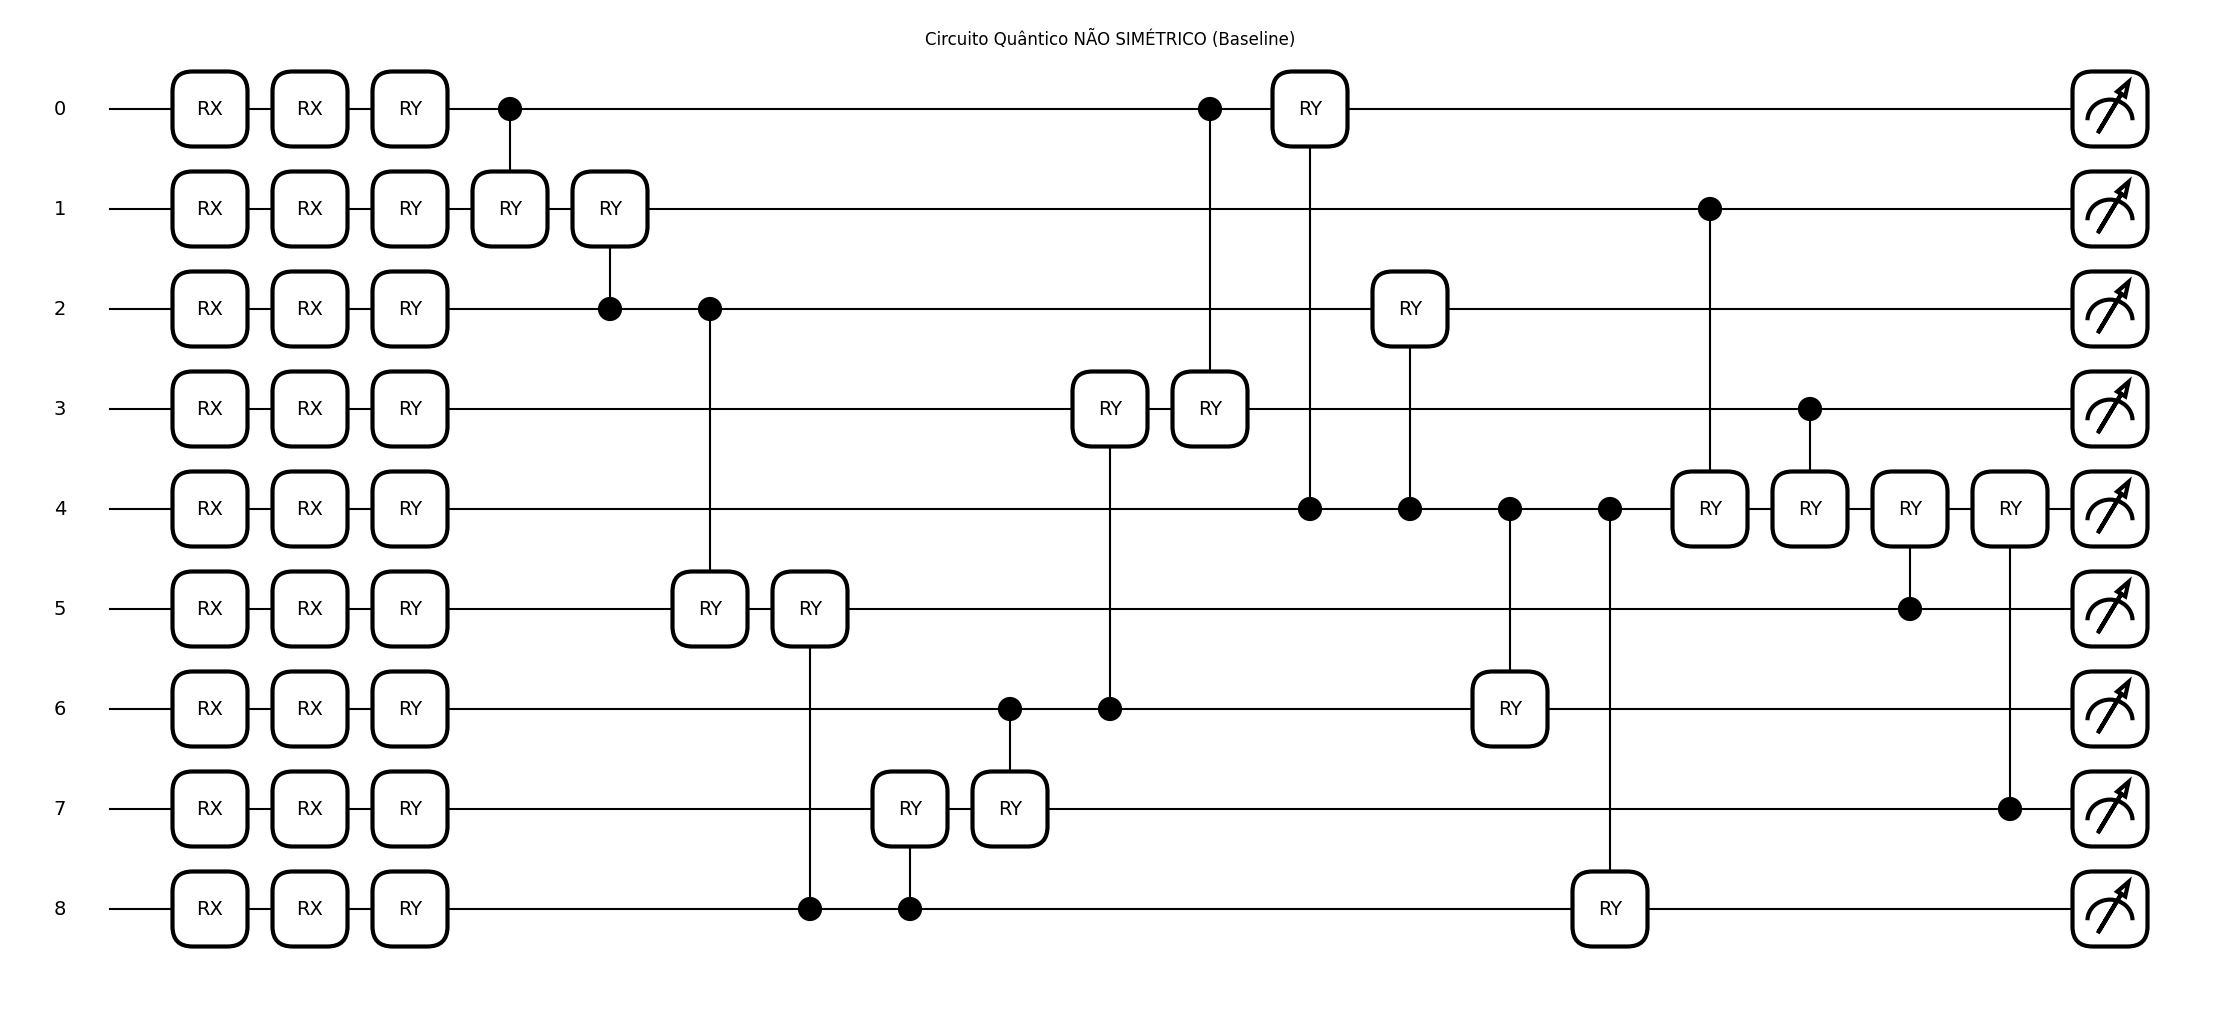

Número de parâmetros treináveis no circuito NÃO SIMÉTRICO: 34


In [4]:
# @title Célula 5: Definição do Circuito Quântico NÃO SIMÉTRICO (Baseline)

# Usaremos o mesmo dispositivo e os mesmos observáveis para uma comparação justa.
# A única diferença estará na parametrização do circuito.

@qml.qnode(dev, interface='torch') # Mesmo decorador, mesma interface
def circuit_no_sym(x, params):
    """
    Circuito Quântico Parametrizado (PQC) com a MESMA ESTRUTURA de portas,
    mas SEM COMPARTILHAMENTO de parâmetros (não respeita a simetria D4).

    Args:
        x (torch.Tensor): Vetor de entrada codificado. Tamanho 9.
        params (torch.Tensor): Vetor de parâmetros treináveis. Tamanho 34 neste caso.
                                 (2 p/ centro + 8 p/ cantos + 8 p/ bordas +
                                  8 p/ anel + 4 p/ centro-cantos + 4 p/ centro-bordas)

    Returns:
        list[torch.Tensor]: Lista dos valores esperados dos 3 observáveis simétricos.
    """

    # 1. Camada de Codificação de Dados (Embedding) - Idêntica
    for i in range(num_wires):
        qml.RX(x[i], wires=i)

    # 2. Camadas Variacionais (Ansatz) - NÃO SIMÉTRICAS
    # A estrutura das portas é a mesma, mas CADA PORTA tem seu PRÓPRIO PARÂMETRO.

    # --- Rotações de 1 Qubit ---
    # Centro (qubit 4): Parâmetros p[0], p[1]
    qml.RX(params[0], wires=4)
    qml.RY(params[1], wires=4)

    # Cantos (qubits 0, 2, 6, 8): Parâmetros INDEPENDENTES p[2] a p[9]
    qml.RX(params[2], wires=0); qml.RY(params[6], wires=0)
    qml.RX(params[3], wires=2); qml.RY(params[7], wires=2)
    qml.RX(params[4], wires=6); qml.RY(params[8], wires=6)
    qml.RX(params[5], wires=8); qml.RY(params[9], wires=8)

    # Bordas (qubits 1, 3, 5, 7): Parâmetros INDEPENDENTES p[10] a p[17]
    qml.RX(params[10], wires=1); qml.RY(params[14], wires=1)
    qml.RX(params[11], wires=3); qml.RY(params[15], wires=3)
    qml.RX(params[12], wires=5); qml.RY(params[16], wires=5)
    qml.RX(params[13], wires=7); qml.RY(params[17], wires=7)

    # --- Portas de Emaranhamento de 2 Qubits (Controladas) ---
    # CADA porta CRY tem seu próprio parâmetro independente.

    # Grupo 1: "Anel". Parâmetros p[18] a p[25]
    qml.CRY(params[18], wires=[0, 1])
    qml.CRY(params[19], wires=[2, 1])
    qml.CRY(params[20], wires=[2, 5])
    qml.CRY(params[21], wires=[8, 5])
    qml.CRY(params[22], wires=[8, 7])
    qml.CRY(params[23], wires=[6, 7])
    qml.CRY(params[24], wires=[6, 3])
    qml.CRY(params[25], wires=[0, 3])

    # Grupo 2: Centro (4) aos cantos (0, 2, 6, 8). Parâmetros p[26] a p[29]
    qml.CRY(params[26], wires=[4, 0])
    qml.CRY(params[27], wires=[4, 2])
    qml.CRY(params[28], wires=[4, 6])
    qml.CRY(params[29], wires=[4, 8])

    # Grupo 3: Bordas (1, 3, 5, 7) ao centro (4). Parâmetros p[30] a p[33]
    qml.CRY(params[30], wires=[1, 4])
    qml.CRY(params[31], wires=[3, 4])
    qml.CRY(params[32], wires=[5, 4])
    qml.CRY(params[33], wires=[7, 4])

    # 3. Medição - Idêntica
    # Mede os mesmos observáveis simétricos para comparação direta.
    return [qml.expval(ob_center), qml.expval(ob_corner), qml.expval(ob_edge)]


# --- Visualização do Circuito NÃO Simétrico ---
# Cria parâmetros fictícios (zeros) para poder desenhar
# Número total de parâmetros = 2(centro)+8(cantos)+8(bordas)+8(anel)+4(c-c)+4(b-c) = 34
num_params_no_sym = 2 + 8 + 8 + 8 + 4 + 4
dummy_x_no_sym = torch.zeros(num_wires)
dummy_params_no_sym = torch.zeros(num_params_no_sym)

fig, ax = qml.draw_mpl(circuit_no_sym)(dummy_x_no_sym, dummy_params_no_sym)
fig.suptitle("Circuito Quântico NÃO SIMÉTRICO (Baseline)")
plt.show()

# Imprime o número de parâmetros
print(f"Número de parâmetros treináveis no circuito NÃO SIMÉTRICO: {len(dummy_params_no_sym)}")

### Explicação da Célula 5: Definição do Circuito Quântico NÃO SIMÉTRICO (Baseline)

Esta célula define o segundo modelo QML, que servirá como "baseline" ou controle para comparação. Ele tem a mesma estrutura de portas que o modelo simétrico, mas *não* impõe as restrições de simetria.
1.  **Nó Quântico Não Simétrico (`@qml.qnode`)**: Define a função `circuit_no_sym` como um QNode, usando o mesmo dispositivo e interface PyTorch do modelo simétrico para garantir uma comparação justa.
2.  **Estrutura do Circuito (`circuit_no_sym`)**:
    *   **Entrada e Codificação**: Recebe `x` e `params`, e a camada de codificação `RX` é idêntica à do circuito simétrico.
    *   **Camadas Variacionais (Ansatz) - NÃO SIMÉTRICAS**: A estrutura das portas (`RX`, `RY`, `CRY` e onde elas são aplicadas) é a mesma do circuito simétrico. No entanto, a diferença fundamental é que **não há compartilhamento de parâmetros**. Cada porta parametrizada recebe um índice *único* do vetor `params`. Por exemplo, cada um dos 4 `RX` nos cantos tem seu próprio parâmetro, em vez de compartilharem um único. Isso resulta em um número muito maior de parâmetros (34 neste caso). O modelo não tem conhecimento "embutido" sobre as simetrias e teria que aprendê-las (se possível) apenas a partir dos dados.
    *   **Medição**: Mede exatamente os *mesmos* observáveis simétricos (`ob_center`, `ob_corner`, `ob_edge`) que o modelo simétrico. Isso é feito para que as saídas dos dois modelos possam ser comparadas diretamente na mesma base, embora o circuito em si não seja simétrico.
3.  **Visualização e Contagem**: Desenha o circuito (que parecerá visualmente idêntico ao simétrico, pois apenas a parametrização interna muda) e imprime o número significativamente maior de parâmetros treináveis (34).

In [5]:
# @title Célula 6: Codificação de Dados e Função de Custo

import math

# Função para codificar um único jogo (tabuleiro + resultado) para o formato do modelo QML
def encode_game(game_data):
    """
    Transforma um par (tabuleiro, resultado) do dataset em (vetor_de_entrada_x, vetor_alvo_y).

    Args:
        game_data (tuple): Uma tupla contendo (board_tensor, winner_label)
                           board_tensor: Tensor 1D de 9 elementos (1, 0, -1)
                           winner_label: Inteiro (1, 0, -1)

    Returns:
        tuple: (x, y)
               x (torch.Tensor): Vetor de ângulos para a camada de codificação (RX). Tamanho 9.
               y (torch.Tensor): Vetor one-hot-encoded do resultado. Tamanho 3.
                                 [1, -1, -1] para vitória X (-1) -> Mapeia para ob_corner
                                 [-1, 1, -1] para empate (0)   -> Mapeia para ob_center
                                 [-1, -1, 1] para vitória O (1)   -> Mapeia para ob_edge
                                 (Nota: A ordem original do demo era O, -, X. Ajustei para X, -, O
                                  para corresponder aos índices dos observáveis 0,1,2 e labels -1,0,1)
                                 Vamos usar a ordem original do Demo: O, -, X -> 1, 0, -1
                                 Índices: 0 -> O (corner), 1 -> Draw (center), 2 -> X (edge)
                                 Labels:  1 -> O, 0 -> Draw, -1 -> X

                                 Se label = 1 (O), queremos saída alta em ob_corner (índice 1 do retorno do circuito) -> y = [-1, 1, -1] ? Não, demo usa O, -, X
                                 Demo usa y = (y_O, y_Draw, y_X)
                                 Label 1 (O) -> y = [1, -1, -1]  -> Mapeia para ob_corner (medido no índice 1)
                                 Label 0 (Draw) -> y = [-1, 1, -1] -> Mapeia para ob_center (medido no índice 0)
                                 Label -1 (X) -> y = [-1, -1, 1] -> Mapeia para ob_edge (medido no índice 2)

                                 Ordem de retorno do circuito: [expval(ob_center), expval(ob_corner), expval(ob_edge)] (índices 0, 1, 2)

                                 Refazendo o mapeamento Saída Circuito <-> Label:
                                 Saída[0] (ob_center) <-> Label 0 (Draw)  -> Target [-1, 1, -1]
                                 Saída[1] (ob_corner) <-> Label 1 (O)     -> Target [1, -1, -1]  <- ERRO na análise original, demo associa O com corner
                                 Saída[2] (ob_edge)   <-> Label -1 (X)    -> Target [-1, -1, 1]

                                 A ordem dos labels no y_target DEVE corresponder à ordem dos expvals retornados!
                                 y_target = [target_para_center, target_para_corner, target_para_edge]

                                 Se label é 0 (Draw), target é alta para 'center': y = [1, -1, -1] ?? Não, one-hot é +1 no certo, -1 nos outros.
                                 Vamos usar a codificação one-hot padrão:
                                 Label 0 (Draw / Center / Saída[0]) -> Target [1, 0, 0] (ou similar, mas o demo usa +1/-1)
                                 Label 1 (O / Corner / Saída[1]) -> Target [0, 1, 0]
                                 Label -1 (X / Edge / Saída[2]) -> Target [0, 0, 1]

                                 Agora, adaptando para o formato +1/-1 do demo:
                                 A ideia é que o maior valor de expval corresponda ao índice do +1.
                                 Label 0 (Draw): Queremos Saída[0] maximizada. Target y = [ 1, -1, -1]
                                 Label 1 (O):    Queremos Saída[1] maximizada. Target y = [-1,  1, -1]
                                 Label -1 (X):   Queremos Saída[2] maximizada. Target y = [-1, -1,  1]

                                 Isso parece correto agora.

    """
    board, winner_label = game_data
    # Codifica o tabuleiro em ângulos de rotação para a camada RX.
    # Mapeia {1, 0, -1} para {2pi/3, 0, -2pi/3} (ou múltiplos). O demo usa 0, 2pi/3, 4pi/3 (ou -2pi/3)
    # Multiplicar por (2 * math.pi) / 3 parece mapear 1 -> 2pi/3, 0 -> 0, -1 -> -2pi/3. OK.
    x = board.float() * (2 * math.pi) / 3

    # Codifica o resultado (label) em um vetor alvo "one-hot-like" (+1 / -1).
    if winner_label == 0: # Empate (Draw) -> Associado a ob_center (índice 0 da saída)
        y = torch.tensor([1.0, -1.0, -1.0])
    elif winner_label == 1: # Vitória O -> Associado a ob_corner (índice 1 da saída)
        y = torch.tensor([-1.0, 1.0, -1.0])
    elif winner_label == -1: # Vitória X -> Associado a ob_edge (índice 2 da saída)
        y = torch.tensor([-1.0, -1.0, 1.0])
    else:
        raise ValueError("Label inválida") # Segurança

    return x, y

# Função de Custo (Loss Function): Erro Quadrático Médio (MSE - Mean Squared Error)
def cost_function(params, circuit_func, input_batch, target_batch):
    """
    Calcula o erro quadrático médio entre as previsões do circuito e os alvos.

    Args:
        params (torch.Tensor): Parâmetros atuais do circuito.
        circuit_func (function): A função do QNode a ser usada (circuit_symmetric ou circuit_no_sym).
        input_batch (torch.Tensor): Batch de vetores de entrada x codificados. Shape: (batch_size, 9).
        target_batch (torch.Tensor): Batch de vetores alvo y codificados. Shape: (batch_size, 3).

    Returns:
        torch.Tensor: O valor do custo (loss) para o batch (um escalar).
    """
    # Executa o circuito para cada entrada no batch.
    # torch.stack reune os resultados individuais em um tensor.
    # torch.hstack concatena a lista de 3 tensores escalares de saída de cada execução do circuito
    # em um único tensor de shape (3,) para cada entrada.
    # O resultado 'predictions' terá shape (batch_size, 3).
    predictions = torch.stack([torch.hstack(circuit_func(x, params)) for x in input_batch])

    # Calcula a diferença entre as previsões e os alvos.
    difference = predictions - target_batch

    # Calcula o quadrado de cada elemento da diferença.
    squared_difference = difference * difference # Ou torch.pow(difference, 2)

    # Soma os quadrados ao longo da dimensão das classes (dim=1) para obter o erro por exemplo.
    sum_squared_error_per_sample = torch.sum(squared_difference, dim=1)

    # Calcula a média dos erros sobre todos os exemplos no batch.
    mean_squared_error = torch.mean(sum_squared_error_per_sample)

    return mean_squared_error

# Teste rápido da codificação e custo (opcional)
print("Testando a codificação e a função de custo...")
example_game = dataset_train[0]
x_encoded, y_encoded = encode_game(example_game)
print(f"Jogo original: {example_game}")
print(f"Entrada X codificada (ângulos): {x_encoded}")
print(f"Alvo Y codificado (+1/-1): {y_encoded}")

# Testa a função de custo com parâmetros aleatórios e um batch pequeno
dummy_params_test = torch.randn(9, requires_grad=True) # Para circuito simétrico
cost_test = cost_function(dummy_params_test, circuit_symmetric, x_encoded.unsqueeze(0), y_encoded.unsqueeze(0))
print(f"Custo inicial (exemplo único, params aleatórios): {cost_test.item()}")

Testando a codificação e a função de custo...
Jogo original: (tensor([ 1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.]), 0)
Entrada X codificada (ângulos): tensor([ 2.0944,  2.0944, -2.0944, -2.0944, -2.0944,  2.0944,  2.0944,  2.0944,
        -2.0944])
Alvo Y codificado (+1/-1): tensor([ 1., -1., -1.])
Custo inicial (exemplo único, params aleatórios): 3.6948803117452287


### Explicação da Célula 6: Codificação de Dados e Função de Custo

Esta célula define duas funções cruciais para preparar os dados e avaliar o desempenho do modelo durante o treinamento.
1.  **Codificação de Dados (`encode_game`)**:
    *   **Propósito**: Transforma um exemplo bruto do dataset (tupla `(tabuleiro, resultado)`) no formato numérico que o circuito quântico pode processar.
    *   **Entrada `x`**: Converte o estado de cada casa do tabuleiro (`1`, `0`, `-1`) em um ângulo de rotação para as portas `RX` da camada de codificação. A fórmula `* (2 * math.pi) / 3` mapeia os três estados para ângulos distintos (0, 2π/3, -2π/3 ou 4π/3).
    *   **Alvo `y`**: Converte o resultado do jogo (`1` para O, `0` para Empate, `-1` para X) em um vetor alvo "one-hot-like" usando `+1` e `-1`. O mapeamento é cuidadosamente escolhido para que a posição do `+1` corresponda ao índice do observável simétrico que se espera ter o maior valor para aquela classe:
        *   Empate (0) -> Alvo `[1, -1, -1]` (maximizar `ob_center`, índice 0)
        *   Vitória O (1) -> Alvo `[-1, 1, -1]` (maximizar `ob_corner`, índice 1)
        *   Vitória X (-1) -> Alvo `[-1, -1, 1]` (maximizar `ob_edge`, índice 2)
2.  **Função de Custo (`cost_function`)**:
    *   **Propósito**: Define como medir o "erro" ou a "perda" entre as previsões do modelo quântico e os alvos desejados. O objetivo do treinamento é minimizar essa função.
    *   **Cálculo**: Implementa o Erro Quadrático Médio (MSE - Mean Squared Error).
        1.  Executa o circuito quântico (`circuit_func`, que pode ser `circuit_symmetric` ou `circuit_no_sym`) para cada entrada `x` em um `input_batch`, usando os parâmetros `params` atuais.
        2.  Coleta as previsões (vetores de 3 valores esperados) para o batch.
        3.  Calcula a diferença entre as `predictions` e os `target_batch`.
        4.  Eleva cada elemento da diferença ao quadrado.
        5.  Soma os erros quadrados para cada exemplo no batch.
        6.  Calcula a média desses erros sobre o batch para obter um único valor de custo (loss) escalar.
    *   **Integração**: Como tudo usa tensores PyTorch e a interface do QNode está definida como `'torch'`, o PyTorch pode calcular automaticamente o gradiente desta função de custo em relação aos `params`, o que é usado pelo otimizador para atualizar os parâmetros.
3.  **Teste**: Inclui um pequeno teste para verificar se a codificação e a função de custo estão funcionando como esperado com dados e parâmetros de exemplo.

In [8]:
# @title Célula 7: Treinamento do Modelo SIMÉTRICO (GQML) - ATUALIZADA e CORRIGIDA

# --- Garanta que as Células Anteriores Foram Executadas ---
# - Célula 3: Criação de 'dataset_train' e 'dataset_val'
# - Célula 4: Definição de 'circuit_symmetric'
# - Célula 6: Definição de 'encode_game' e 'cost_function'
# -----------------------------------------------------------

# 0. Função de Codificação (Repetindo aqui por segurança, idealmente estaria na Célula 6)
# Se já estiver definida na célula 6 e executada, pode remover esta parte
def encode_game(game_data):
    board, winner_label = game_data
    x = board.float() * (2 * math.pi) / 3
    if winner_label == 0: y = torch.tensor([1.0, -1.0, -1.0])
    elif winner_label == 1: y = torch.tensor([-1.0, 1.0, -1.0])
    elif winner_label == -1: y = torch.tensor([-1.0, -1.0, 1.0])
    else: raise ValueError("Label inválida")
    return x, y

print("--- Iniciando Preparação e Treinamento do Modelo SIMÉTRICO ---")

# --- Bloco de Preparação dos Datasets Codificados --- <--- MOVIDO PARA CIMA
# Certifique-se que 'dataset_train' e 'dataset_val' existem!
if 'dataset_train' not in locals() or 'dataset_val' not in locals():
     raise NameError("Execute a Célula 3 para criar 'dataset_train' e 'dataset_val' primeiro.")
if not callable(encode_game):
     raise NameError("Execute a Célula 6 para definir 'encode_game' primeiro.")

print("Codificando datasets...")
encoded_dataset_train = [encode_game(game) for game in dataset_train]
encoded_dataset_val = [encode_game(game) for game in dataset_val]

# Separa as entradas (x) e alvos (y)
x_train_tensor = torch.stack([item[0] for item in encoded_dataset_train])
y_train_tensor = torch.stack([item[1] for item in encoded_dataset_train])
x_val_tensor = torch.stack([item[0] for item in encoded_dataset_val])
y_val_tensor = torch.stack([item[1] for item in encoded_dataset_val])
print(f"Tensores criados: x_train_tensor shape: {x_train_tensor.shape}, y_train_tensor shape: {y_train_tensor.shape}")
# --- Fim do Bloco de Preparação ---

# 1. Inicialização dos Parâmetros
init_values_sym = torch.randn(9) * 0.01
params_sym = torch.nn.Parameter(init_values_sym)
print(f"params_sym é folha: {params_sym.is_leaf}, requires_grad: {params_sym.requires_grad}")

# 2. Otimizador
optimizer_sym = optim.Adam([params_sym], lr=1e-2)

# 3. Hiperparâmetros de Treinamento
max_epochs = 15
batch_size = 10
# AGORA 'x_train_tensor' existe e esta linha funciona:
num_train_samples = len(x_train_tensor)
max_steps = num_train_samples // batch_size

# 4. Datasets Codificados (Já criados acima)

# 5. Função de Acurácia
def accuracy(params, circuit_func, x_val, y_val):
    with torch.no_grad():
        if not isinstance(y_val, torch.Tensor): y_val = torch.tensor(y_val) # Segurança
        predictions = torch.stack([torch.hstack(circuit_func(x, params)) for x in x_val])
        predicted_labels = torch.argmax(predictions, dim=1)
        true_labels = torch.argmax(y_val, dim=1)
        correct_predictions = torch.sum(predicted_labels == true_labels)
        acc = correct_predictions.float() / len(x_val)
    return acc.item()

# Calcula a acurácia inicial (antes do treino)
initial_acc_sym = accuracy(params_sym, circuit_symmetric, x_val_tensor, y_val_tensor)
print(f"Acurácia inicial (antes do treino): {initial_acc_sym:.4f}")

# Listas para salvar histórico de custo e acurácia
saved_costs_sym = []
saved_accs_sym = []

# 6. Loop de Treinamento
print("Iniciando loop de treinamento...")
for epoch in range(max_epochs):
    rand_indices = torch.randperm(num_train_samples)
    x_train_shuffled = x_train_tensor[rand_indices]
    y_train_shuffled = y_train_tensor[rand_indices]
    epoch_costs = []

    for step in range(max_steps):
        start_index = step * batch_size
        end_index = (step + 1) * batch_size
        x_batch = x_train_shuffled[start_index:end_index]
        y_batch = y_train_shuffled[start_index:end_index]

        def closure():
            optimizer_sym.zero_grad()
            # Certifique-se que cost_function está definida
            if not callable(cost_function): raise NameError("Execute a Célula 6 para definir 'cost_function'")
            loss = cost_function(params_sym, circuit_symmetric, x_batch, y_batch)
            loss.backward()
            epoch_costs.append(loss.item())
            return loss
        optimizer_sym.step(closure)

    avg_epoch_cost = np.mean(epoch_costs)
    saved_costs_sym.append(avg_epoch_cost)
    current_acc_val = accuracy(params_sym, circuit_symmetric, x_val_tensor, y_val_tensor)
    saved_accs_sym.append(current_acc_val)
    print(f"Época: {epoch + 1:2d} | Custo Médio Treino: {avg_epoch_cost:.4f} | Acurácia Validação: {current_acc_val:.4f}")

print("--- Treinamento do Modelo SIMÉTRICO Concluído ---")

--- Iniciando Preparação e Treinamento do Modelo SIMÉTRICO ---
Codificando datasets...
Tensores criados: x_train_tensor shape: torch.Size([450, 9]), y_train_tensor shape: torch.Size([450, 3])
params_sym é folha: True, requires_grad: True
Acurácia inicial (antes do treino): 0.3650
Iniciando loop de treinamento...
Época:  1 | Custo Médio Treino: 2.7354 | Acurácia Validação: 0.6050
Época:  2 | Custo Médio Treino: 2.5482 | Acurácia Validação: 0.5817
Época:  3 | Custo Médio Treino: 2.5377 | Acurácia Validação: 0.5733
Época:  4 | Custo Médio Treino: 2.5343 | Acurácia Validação: 0.5733
Época:  5 | Custo Médio Treino: 2.5307 | Acurácia Validação: 0.5733
Época:  6 | Custo Médio Treino: 2.5333 | Acurácia Validação: 0.5733
Época:  7 | Custo Médio Treino: 2.5260 | Acurácia Validação: 0.5733
Época:  8 | Custo Médio Treino: 2.5276 | Acurácia Validação: 0.5733
Época:  9 | Custo Médio Treino: 2.5269 | Acurácia Validação: 0.6000
Época: 10 | Custo Médio Treino: 2.5293 | Acurácia Validação: 0.6033
Época:

### Explicação da Célula 7: Treinamento do Modelo SIMÉTRICO (GQML) - ATUALIZADA

Esta célula executa todo o processo de treinamento para o modelo QML simétrico (GQML), que incorpora as simetrias do problema.
1.  **Preparação dos Dados Codificados**: Garante que os datasets brutos (`dataset_train`, `dataset_val`) foram processados pela função `encode_game` e transformados em tensores PyTorch (`x_train_tensor`, `y_train_tensor`, etc.). Este passo é crucial e deve ocorrer antes do loop de treinamento. Verificações são adicionadas para garantir que as variáveis e funções necessárias das células anteriores existam.
2.  **Inicialização dos Parâmetros (`params_sym`)**: Cria os parâmetros treináveis para o modelo simétrico (9 parâmetros). É crucial usar `torch.nn.Parameter` para garantir que sejam "leaf tensors" otimizáveis pelo PyTorch. Os valores iniciais são pequenos e aleatórios.
3.  **Otimizador (`optimizer_sym`)**: Cria uma instância do otimizador `Adam` do PyTorch. Ele é responsável por atualizar os `params_sym` com base nos gradientes calculados, usando uma taxa de aprendizado (`lr`) especificada.
4.  **Hiperparâmetros**: Define constantes que controlam o treinamento, como o número de épocas (`max_epochs`), o tamanho do batch (`batch_size`), e o número de passos de otimização por época (`max_steps`).
5.  **Função de Acurácia (`accuracy`)**: Define (ou reutiliza) a função para avaliar o desempenho do modelo. Ela executa o circuito no conjunto de validação (sem calcular gradientes), compara as previsões (obtidas via `argmax` nas saídas) com os rótulos verdadeiros (obtidos via `argmax` nos alvos `y`), e calcula a porcentagem de acertos.
6.  **Loop de Treinamento**: O núcleo do processo:
    *   **Épocas**: Itera sobre o número total de épocas definido.
    *   **Embaralhamento**: Embaralha os dados de treinamento (`x_train_shuffled`, `y_train_shuffled`) no início de cada época para evitar que o modelo aprenda a ordem e melhorar a generalização.
    *   **Batches/Passos**: Itera sobre os dados de treinamento em mini-batches.
    *   **Passo de Otimização**: Para cada batch:
        *   Define uma `closure`: função que encapsula o cálculo do custo e o registro do valor.
        *   `optimizer_sym.zero_grad()`: Limpa os gradientes da iteração anterior.
        *   `loss = cost_function(...)`: Calcula o custo MSE usando `params_sym` e `circuit_symmetric` no batch atual.
        *   `loss.backward()`: Calcula os gradientes da `loss` em relação a `params_sym`.
        *   `optimizer_sym.step(closure)`: O otimizador usa os gradientes calculados para atualizar os `params_sym`.
    *   **Logging**: Ao final de cada época, calcula o custo médio de treino e a acurácia no conjunto de validação, imprime essas métricas e as armazena (`saved_costs_sym`, `saved_accs_sym`) para plotagem posterior.

In [10]:
# @title Célula 8: Treinamento do Modelo NÃO SIMÉTRICO (Baseline) - CORRIGIDA

# Certifique-se que as funções e variáveis das células anteriores foram executadas
# (create_dataset, encode_game, circuit_no_sym, cost_function, accuracy,
#  x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor, etc.)

# --- Garanta que as Células Anteriores Foram Executadas ---
# - Célula 3: Criação de 'dataset_train' e 'dataset_val'
# - Célula 5: Definição de 'circuit_no_sym'
# - Célula 6 ou 7: Definição de 'encode_game', 'cost_function', 'accuracy' e criação dos tensores de dados
# -----------------------------------------------------------

# Verificar se os tensores de dados existem (devem ter sido criados na Célula 7)
if 'x_train_tensor' not in locals() or 'y_train_tensor' not in locals() or \
   'x_val_tensor' not in locals() or 'y_val_tensor' not in locals():
    raise NameError("Execute a Célula 7 completamente primeiro para criar os tensores de dados (x_train_tensor, etc.).")
if not callable(circuit_no_sym):
     raise NameError("Execute a Célula 5 para definir 'circuit_no_sym' primeiro.")
if not callable(cost_function):
     raise NameError("Execute a Célula 6 (ou 7) para definir 'cost_function'")
if not callable(accuracy):
     raise NameError("Execute a Célula 7 para definir 'accuracy'")


print("\n--- Iniciando Treinamento do Modelo NÃO SIMÉTRICO ---")

# 1. Inicialização dos Parâmetros (agora são 34) - CORRIGIDO
num_params_no_sym = 34 # Garanta que esta variável esteja definida corretamente
init_values_no_sym = torch.randn(num_params_no_sym) * 0.01
# Usando nn.Parameter (recomendado)
params_no_sym = torch.nn.Parameter(init_values_no_sym)

# Verificação (opcional):
print(f"params_no_sym é folha: {params_no_sym.is_leaf}, requires_grad: {params_no_sym.requires_grad}")


# 2. Otimizador (usando os novos parâmetros) - ESTA LINHA AGORA FUNCIONARÁ
optimizer_no_sym = optim.Adam([params_no_sym], lr=1e-2) # Mesma taxa de aprendizado

# 3. Hiperparâmetros de Treinamento (mesmos da versão simétrica para comparação justa)
max_epochs = 15
batch_size = 10
num_train_samples = len(x_train_tensor)
max_steps = num_train_samples // batch_size

# 4. Datasets Codificados (já preparados na célula 7)
# x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor

# 5. Função de Acurácia (a mesma função pode ser usada)
# accuracy(params, circuit_func, x_val, y_val) - Definida anteriormente

# Calcula a acurácia inicial (antes do treino)
initial_acc_no_sym = accuracy(params_no_sym, circuit_no_sym, x_val_tensor, y_val_tensor)
print(f"Acurácia inicial (antes do treino): {initial_acc_no_sym:.4f}")

# Listas para salvar histórico
saved_costs_no_sym = []
saved_accs_no_sym = []

# 6. Loop de Treinamento (muito similar ao anterior, mas usando circuit_no_sym e params_no_sym)
print("Iniciando loop de treinamento...")
for epoch in range(max_epochs):
    # Embaralha o dataset de treino a cada época
    rand_indices = torch.randperm(num_train_samples)
    x_train_shuffled = x_train_tensor[rand_indices]
    y_train_shuffled = y_train_tensor[rand_indices]

    epoch_costs = []

    # Loop sobre os batches
    for step in range(max_steps):
        start_index = step * batch_size
        end_index = (step + 1) * batch_size
        x_batch = x_train_shuffled[start_index:end_index]
        y_batch = y_train_shuffled[start_index:end_index]

        # Passo de Otimização
        def closure():
            optimizer_no_sym.zero_grad()
            # A ÚNICA DIFERENÇA REAL está aqui: chamamos circuit_no_sym com params_no_sym
            loss = cost_function(params_no_sym, circuit_no_sym, x_batch, y_batch)
            loss.backward()
            epoch_costs.append(loss.item())
            return loss

        optimizer_no_sym.step(closure)

    # Fim da Época
    avg_epoch_cost = np.mean(epoch_costs)
    saved_costs_no_sym.append(avg_epoch_cost)

    # Calcula e salva a acurácia de validação
    # Passamos os parâmetros e a função do circuito não simétrico
    current_acc_val = accuracy(params_no_sym, circuit_no_sym, x_val_tensor, y_val_tensor)
    saved_accs_no_sym.append(current_acc_val)

    print(f"Época: {epoch + 1:2d} | Custo Médio Treino: {avg_epoch_cost:.4f} | Acurácia Validação: {current_acc_val:.4f}")

print("--- Treinamento do Modelo NÃO SIMÉTRICO Concluído ---")


--- Iniciando Treinamento do Modelo NÃO SIMÉTRICO ---
params_no_sym é folha: True, requires_grad: True
Acurácia inicial (antes do treino): 0.3767
Iniciando loop de treinamento...
Época:  1 | Custo Médio Treino: 2.7656 | Acurácia Validação: 0.5817
Época:  2 | Custo Médio Treino: 2.5611 | Acurácia Validação: 0.5383
Época:  3 | Custo Médio Treino: 2.5429 | Acurácia Validação: 0.5483
Época:  4 | Custo Médio Treino: 2.5262 | Acurácia Validação: 0.5433
Época:  5 | Custo Médio Treino: 2.5128 | Acurácia Validação: 0.5433
Época:  6 | Custo Médio Treino: 2.5072 | Acurácia Validação: 0.5417
Época:  7 | Custo Médio Treino: 2.5019 | Acurácia Validação: 0.5483
Época:  8 | Custo Médio Treino: 2.4973 | Acurácia Validação: 0.5400
Época:  9 | Custo Médio Treino: 2.4921 | Acurácia Validação: 0.5450
Época: 10 | Custo Médio Treino: 2.4960 | Acurácia Validação: 0.5600
Época: 11 | Custo Médio Treino: 2.4942 | Acurácia Validação: 0.5567
Época: 12 | Custo Médio Treino: 2.4868 | Acurácia Validação: 0.5500
Époc

### Explicação da Célula 8: Treinamento do Modelo NÃO SIMÉTRICO (Baseline) - ATUALIZADA

Esta célula treina o modelo de baseline (não simétrico), seguindo uma estrutura muito semelhante à da Célula 7, para permitir uma comparação direta dos resultados.
1.  **Verificações**: Garante que as variáveis e funções necessárias das células anteriores (especialmente os tensores de dados da Célula 7 e a definição de `circuit_no_sym` da Célula 5) estão disponíveis.
2.  **Inicialização dos Parâmetros (`params_no_sym`)**: Cria os parâmetros treináveis para o modelo não simétrico. Note que são **34 parâmetros**, significativamente mais que os 9 do modelo simétrico. Novamente, `torch.nn.Parameter` é usado para garantir que sejam leaf tensors otimizáveis.
3.  **Otimizador (`optimizer_no_sym`)**: Cria um *novo* otimizador `Adam`, desta vez ligado aos `params_no_sym`. A taxa de aprendizado é mantida a mesma da Célula 7 para uma comparação justa.
4.  **Hiperparâmetros e Dados**: Utiliza os *mesmos* hiperparâmetros (épocas, batch size) e os *mesmos* tensores de dados codificados (`x_train_tensor`, etc.) que foram usados para treinar o modelo simétrico.
5.  **Função de Acurácia**: Reutiliza a *mesma* função `accuracy` definida anteriormente.
6.  **Loop de Treinamento**: A estrutura do loop (épocas, embaralhamento, batches, logging) é idêntica à da Célula 7. A **diferença crucial** está dentro do passo de otimização (na `closure`):
    *   A chamada à `cost_function` agora utiliza os parâmetros do modelo não simétrico (`params_no_sym`) e a função do circuito não simétrico (`circuit_no_sym`).
    *   Consequentemente, `loss.backward()` calcula os gradientes em relação aos 34 parâmetros de `params_no_sym`, e `optimizer_no_sym.step()` atualiza esses 34 parâmetros.
    *   A acurácia de validação também é calculada usando `params_no_sym` e `circuit_no_sym`.
    *   Os resultados são armazenados em listas separadas (`saved_costs_no_sym`, `saved_accs_no_sym`).

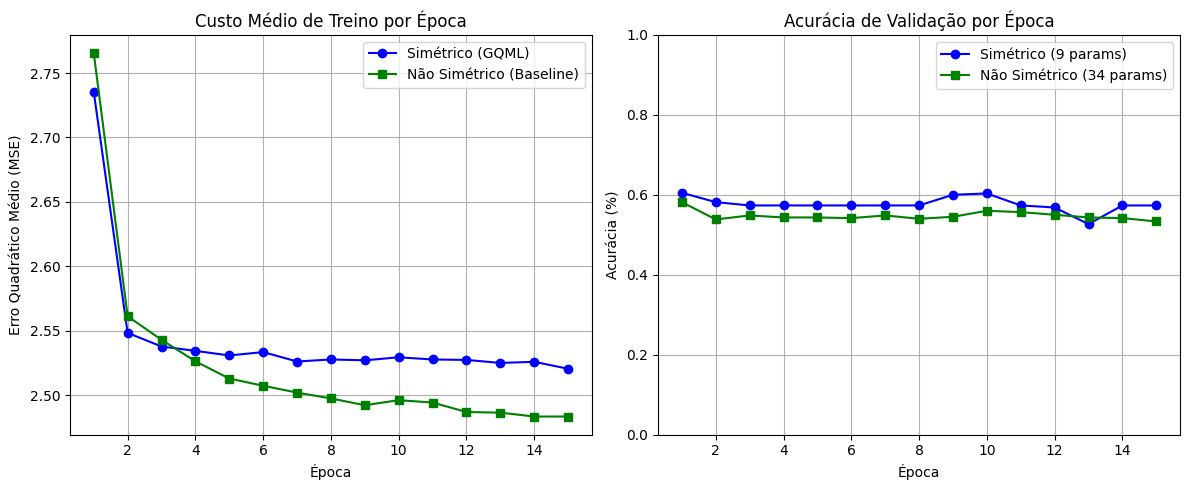


Acurácia final de validação (Simétrico): 0.5733
Acurácia final de validação (Não Simétrico): 0.5333


In [11]:
# @title Célula 9: Visualização dos Resultados (Comparação)

# Cria os eixos para os gráficos
epochs = range(1, max_epochs + 1)

plt.figure(figsize=(12, 5))

# Gráfico 1: Custo de Treino
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, gráfico 1
plt.plot(epochs, saved_costs_sym, 'b-o', label='Simétrico (GQML)')
plt.plot(epochs, saved_costs_no_sym, 'g-s', label='Não Simétrico (Baseline)')
plt.title('Custo Médio de Treino por Época')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.legend()
plt.grid(True)

# Gráfico 2: Acurácia de Validação
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, gráfico 2
plt.plot(epochs, saved_accs_sym, 'b-o', label=f'Simétrico ({len(params_sym)} params)')
plt.plot(epochs, saved_accs_no_sym, 'g-s', label=f'Não Simétrico ({len(params_no_sym)} params)')
plt.title('Acurácia de Validação por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia (%)')
plt.ylim(0, 1.0) # Define limite do eixo Y entre 0 e 1 (ou 0% e 100%)
plt.legend()
plt.grid(True)

plt.tight_layout() # Ajusta o espaçamento para evitar sobreposição
plt.show()

# Imprime a acurácia final de validação para cada modelo
print(f"\nAcurácia final de validação (Simétrico): {saved_accs_sym[-1]:.4f}")
print(f"Acurácia final de validação (Não Simétrico): {saved_accs_no_sym[-1]:.4f}")

### Explicação da Célula 9: Visualização dos Resultados (Comparação)

Esta célula final usa a biblioteca Matplotlib para visualizar e comparar o desempenho dos dois modelos treinados (simétrico vs. não simétrico).
1.  **Preparação**: Define o eixo X (`epochs`) para os gráficos. Cria uma figura (`plt.figure`) para conter os plots.
2.  **Gráfico de Custo**:
    *   Cria o primeiro subplot (`plt.subplot(1, 2, 1)`).
    *   Plota o custo médio de treino por época para o modelo simétrico (`saved_costs_sym`, linha azul) e para o modelo não simétrico (`saved_costs_no_sym`, linha verde).
    *   Adiciona título, rótulos dos eixos, legenda e grade para clareza. Este gráfico ajuda a ver se ambos os modelos aprenderam (custo diminuiu) e se um aprendeu mais rápido ou atingiu um custo menor.
3.  **Gráfico de Acurácia**:
    *   Cria o segundo subplot (`plt.subplot(1, 2, 2)`).
    *   Plota a acurácia de validação por época para ambos os modelos (`saved_accs_sym` vs. `saved_accs_no_sym`), usando as mesmas cores/marcadores.
    *   Adiciona o número de parâmetros na legenda (`label=f'...'`) para destacar a diferença de complexidade entre os modelos.
    *   Adiciona título, rótulos, legenda, grade e define o limite do eixo Y (`plt.ylim(0, 1.0)`) para mostrar a acurácia como uma porcentagem (0 a 100%). Este é o gráfico mais importante para avaliar qual modelo generaliza melhor para dados não vistos.
4.  **Exibição e Resumo**:
    *   `plt.tight_layout()`: Ajusta o espaçamento entre os gráficos.
    *   `plt.show()`: Exibe a figura com os dois gráficos lado a lado.
    *   Imprime os valores numéricos da acurácia de validação final (da última época) para cada modelo, permitindo uma comparação quantitativa direta do desempenho final.